In [2]:
import io
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No Missing values in the dataset and all columns are Numeric . so no encoding or missing values treatment needed.

In [7]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# Sorting Data on numbers of Wins in Descending order

In [8]:
df=df.sort_values("W", ascending=False)

In [9]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
15,100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

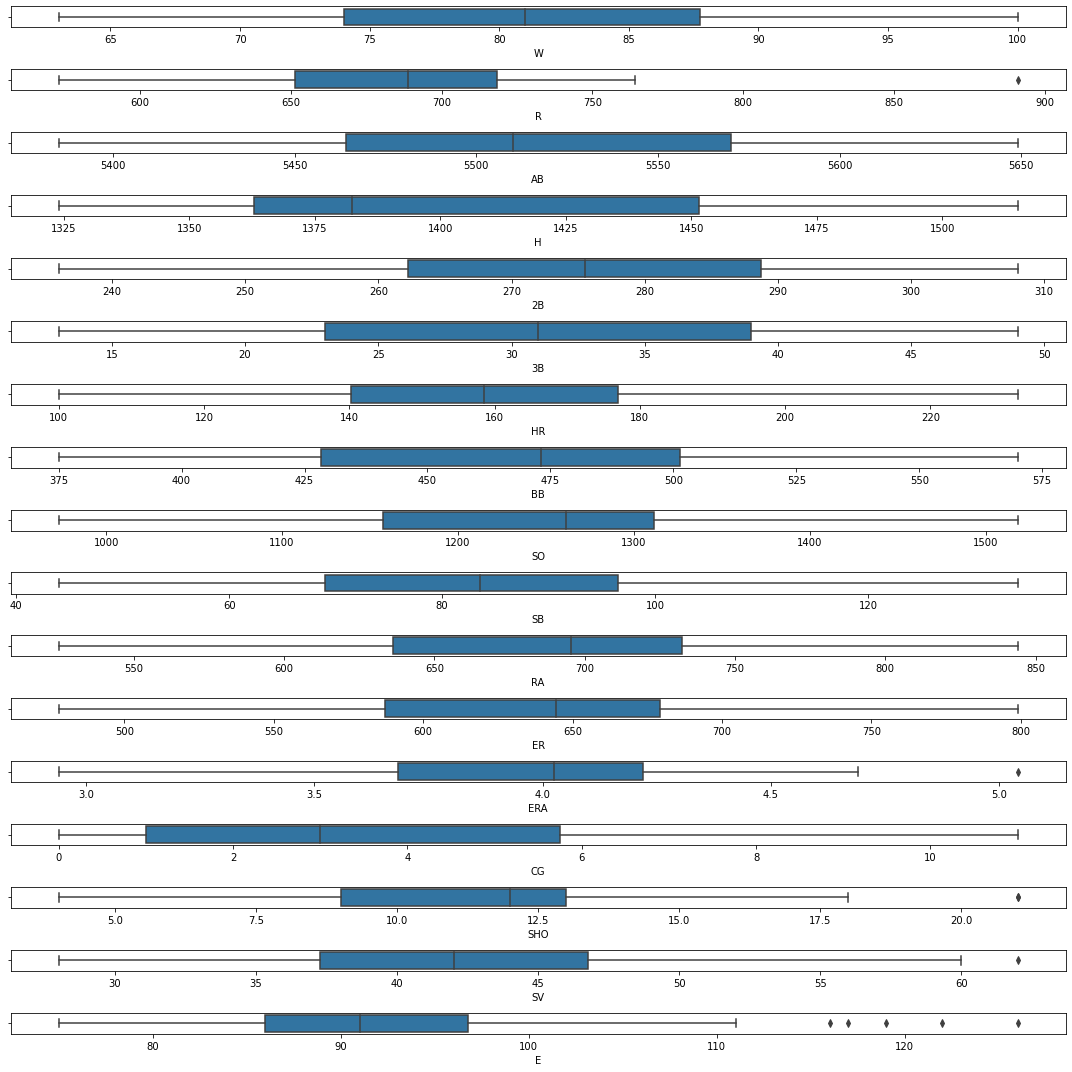

In [11]:
fig, axs = plt.subplots(17, figsize = (15,15))
plt1 = sns.boxplot(df['W'], ax = axs[0])
plt2 = sns.boxplot(df['R'], ax = axs[1])
plt3 = sns.boxplot(df['AB'], ax = axs[2])
plt4 = sns.boxplot(df['H'], ax = axs[3])
plt5 = sns.boxplot(df['2B'], ax = axs[4])
plt6 = sns.boxplot(df['3B'], ax = axs[5])
plt7 = sns.boxplot(df['HR'], ax = axs[6])
plt8 = sns.boxplot(df['BB'], ax = axs[7])
plt9 = sns.boxplot(df['SO'], ax = axs[8])
plt10 = sns.boxplot(df['SB'], ax = axs[9])
plt11 = sns.boxplot(df['RA'], ax = axs[10])
plt12 = sns.boxplot(df['ER'], ax = axs[11])
plt13 = sns.boxplot(df['ERA'], ax = axs[12])
plt14 = sns.boxplot(df['CG'], ax = axs[13])
plt15 = sns.boxplot(df['SHO'], ax = axs[14])
plt16 = sns.boxplot(df['SV'], ax = axs[15])
plt17 = sns.boxplot(df['E'], ax = axs[16])
plt.tight_layout()    

Outliers exist R,ERA,SHO,SV,E and needs to be treated

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

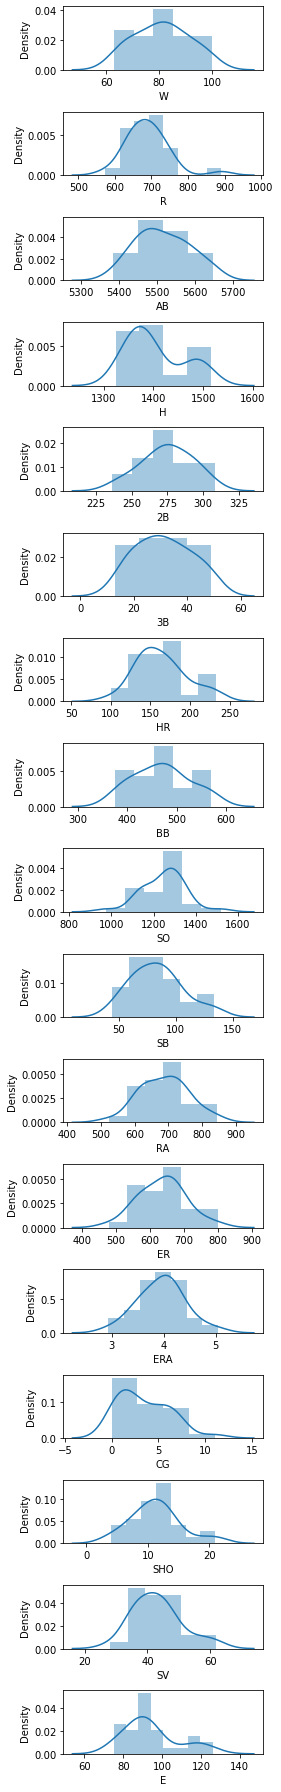

In [12]:
fig, axs = plt.subplots(17, figsize = (4,25))
plt1 = sns.distplot(df['W'], ax = axs[0])
plt2 = sns.distplot(df['R'], ax = axs[1])
plt3 = sns.distplot(df['AB'], ax = axs[2])
plt4 = sns.distplot(df['H'], ax = axs[3])
plt5 = sns.distplot(df['2B'], ax = axs[4])
plt6 = sns.distplot(df['3B'], ax = axs[5])
plt7 = sns.distplot(df['HR'], ax = axs[6])
plt8 = sns.distplot(df['BB'], ax = axs[7])
plt9 = sns.distplot(df['SO'], ax = axs[8])
plt10 = sns.distplot(df['SB'], ax = axs[9])
plt11 = sns.distplot(df['RA'], ax = axs[10])
plt12 = sns.distplot(df['ER'], ax = axs[11])
plt13 = sns.distplot(df['ERA'], ax = axs[12])
plt14 = sns.distplot(df['CG'], ax = axs[13])
plt15 = sns.distplot(df['SHO'], ax = axs[14])
plt16 = sns.distplot(df['SV'], ax = axs[15])
plt17 = sns.distplot(df['E'], ax = axs[16])
plt.tight_layout()   

Except W and 3B all the other columns are slightly skewed

In [13]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Column R,H,CG and E needs to be treated for skewness

<AxesSubplot:>

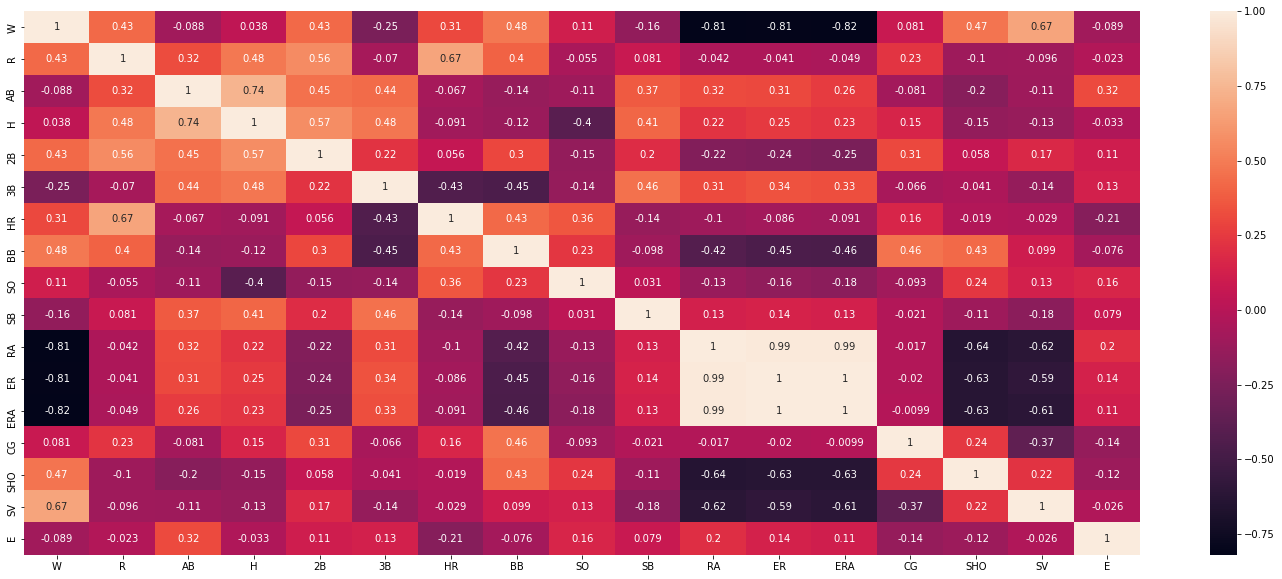

In [17]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

From the above we can see that columns RA, ER and ERA have very low correlation towards the target variable W and they are strongly correlated among them. so we can drop off those 3 columns

In [20]:
df=df.drop(["RA","ERA","ER"],axis=1)

<AxesSubplot:>

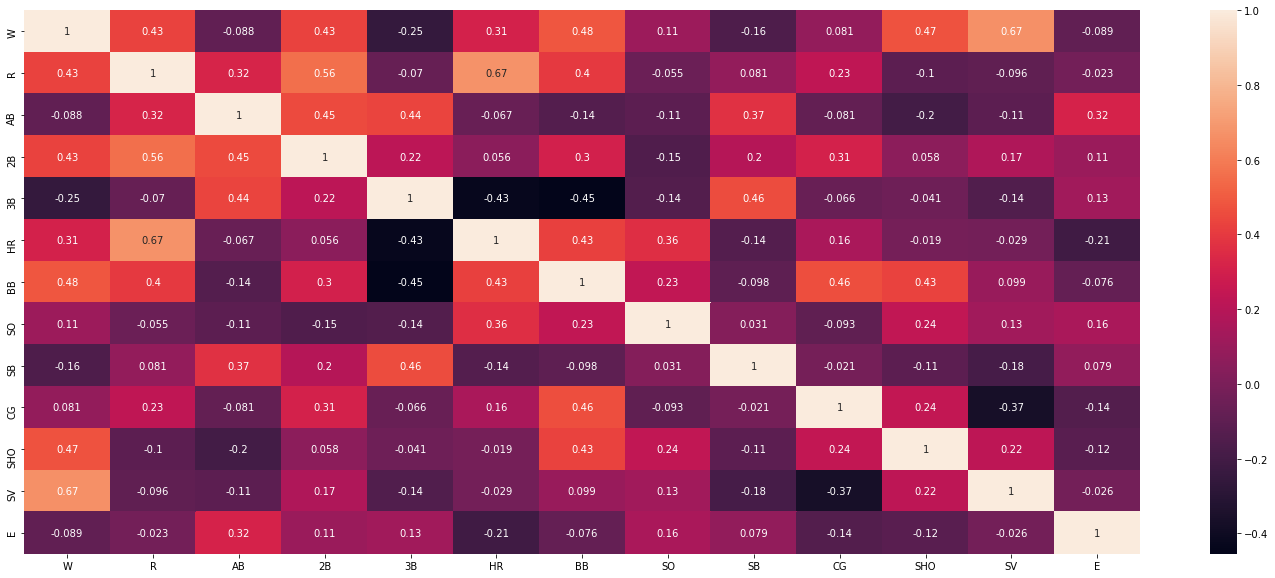

In [23]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

In [22]:
df=df.drop(["H"],axis=1)

# Treating Outliers

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(30, 13)

In [25]:
z1=pd.DataFrame(z)
z1
z1.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.851896,0.713699,0.465723,0.745685,0.749270,0.851220,0.657815,0.184286,0.646405,0.907856,0.913371,2.447094,0.121439
1,1.657301,0.151740,1.656011,0.970514,0.418423,0.755338,0.144398,0.723420,0.646405,1.275906,0.419657,1.413111,2.015894
2,1.560004,0.013270,0.364688,0.153633,0.126500,0.235444,1.745261,2.644696,0.512666,0.932393,2.394514,0.637623,1.214394
3,1.365409,0.619078,0.847731,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.539806,0.814629,1.671607,0.461470
4,1.170814,3.509647,0.104884,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,1.300442,0.320914,1.171848,0.461470
5,1.073516,0.367523,1.894646,0.659500,0.515731,0.746815,1.673953,0.096064,1.092202,0.932393,2.394514,0.508375,1.408697
6,0.878921,0.090583,0.154920,1.139136,1.391501,0.427208,0.336930,0.409742,1.448839,0.907856,0.666514,0.896119,0.461470
7,0.684326,1.086415,0.076017,0.239818,0.068115,0.267405,0.604334,0.148997,0.780144,0.564343,0.567771,0.249879,1.797303
8,0.587028,1.311430,0.732263,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.171757,1.802057,0.637623,0.097152
9,0.489731,0.705622,0.826562,0.183611,0.515731,2.121125,0.301276,1.409590,1.671738,0.564343,0.419657,0.525608,0.680061


In [26]:
df1=df[(z<3).all(axis=1)]
df1

,W,R,AB,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
15,100,647,5484,288,39,137,506,1267,69,1,15,62,96
16,98,697,5631,292,27,140,461,1322,98,0,13,54,122
17,97,689,5491,272,30,171,567,1518,95,6,21,48,111
0,95,724,5575,300,42,139,383,973,104,2,8,56,88
25,92,667,5385,263,26,187,563,1258,59,6,21,47,75
20,90,683,5527,295,17,177,488,1290,51,1,14,50,88
10,88,751,5511,279,32,172,503,1233,101,5,9,45,119
6,87,764,5567,272,19,212,554,1227,63,3,4,48,93
11,86,729,5459,278,26,230,486,1392,121,5,13,39,85
12,85,661,5417,243,21,176,435,1150,52,2,12,46,93


In [27]:
df1.shape

(29, 13)

In [28]:
Data_loss=((30-29)/30)*100
Data_loss

3.3333333333333335

In [29]:
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# Skewness Treatment

In [31]:
x=df1.iloc[:,1:]
y=df1.iloc[:,-12]
y

15    647
16    697
17    689
0     724
25    667
20    683
10    751
6     764
11    729
12    661
26    696
21    703
1     696
2     669
7     713
8     644
27    720
9     748
3     622
13    656
28    650
4     689
22    613
18    655
14    694
29    737
23    573
19    640
24    626
Name: R, dtype: int64

In [32]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# Scaling Data

In [34]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)


# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9994836594211115
At random state 0,the testing accuracy is:- 0.9910403715075161


At random state 1,the training accuracy is:- 0.9990303934879377
At random state 1,the testing accuracy is:- 0.9992400301754077


At random state 2,the training accuracy is:- 0.9992872917904411
At random state 2,the testing accuracy is:- 0.9943601113034463


At random state 3,the training accuracy is:- 0.9994618033941364
At random state 3,the testing accuracy is:- 0.9956808630752123


At random state 4,the training accuracy is:- 0.9994258219144659
At random state 4,the testing accuracy is:- 0.990603944707711


At random state 5,the training accuracy is:- 0.9994621044862471
At random state 5,the testing accuracy is:- 0.9959493242242049


At random state 6,the training accuracy is:- 0.9994399996904645
At random state 6,the testing accuracy is:- 0.9952974757739577


At random state 7,the training accuracy is:- 0.9994810028254945
At random state 7,the testing accu

At random state 66,the training accuracy is:- 0.9994307153048929
At random state 66,the testing accuracy is:- 0.9930747359468468


At random state 67,the training accuracy is:- 0.99921078231025
At random state 67,the testing accuracy is:- 0.9971635229489321


At random state 68,the training accuracy is:- 0.9990804520374175
At random state 68,the testing accuracy is:- 0.9977633711652629


At random state 69,the training accuracy is:- 0.9990509681343226
At random state 69,the testing accuracy is:- 0.9986765720089038


At random state 70,the training accuracy is:- 0.9995635725376156
At random state 70,the testing accuracy is:- 0.9716434165231632


At random state 71,the training accuracy is:- 0.9991552329205193
At random state 71,the testing accuracy is:- 0.9956283535197065


At random state 72,the training accuracy is:- 0.9995413703649918
At random state 72,the testing accuracy is:- 0.9967056412035702


At random state 73,the training accuracy is:- 0.9992455831363206
At random state 73,t

We will be using random state 62 where testing and training accuracy is 99.89%

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=62)

In [37]:
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)
print(r2_score(y_test,pred_test))

0.9989790276964307


In [38]:
Accuracy_Train=r2_score(y_train,pred_train)
Accuracy_Test=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvscore=cross_val_score(LR,x,y,cv=j)
    cvmean=cvscore.mean()
    print(f"At cross fold {j} the cv score is {cvmean} and accuracy score for training is {Accuracy_Train} and accuracy for the testing is {Accuracy_Test}")
    print("\n")

At cross fold 2 the cv score is 0.9890834036252127 and accuracy score for training is -1.492838739002058 and accuracy for the testing is 0.9989790276964307


At cross fold 3 the cv score is 0.991644504537061 and accuracy score for training is -1.492838739002058 and accuracy for the testing is 0.9989790276964307


At cross fold 4 the cv score is 0.9926582847691898 and accuracy score for training is -1.492838739002058 and accuracy for the testing is 0.9989790276964307


At cross fold 5 the cv score is 0.9937459701816167 and accuracy score for training is -1.492838739002058 and accuracy for the testing is 0.9989790276964307


At cross fold 6 the cv score is 0.9868377176490767 and accuracy score for training is -1.492838739002058 and accuracy for the testing is 0.9989790276964307


At cross fold 7 the cv score is 0.990868622037026 and accuracy score for training is -1.492838739002058 and accuracy for the testing is 0.9989790276964307


At cross fold 8 the cv score is 0.9919474172778879 and

we will be using CV=5

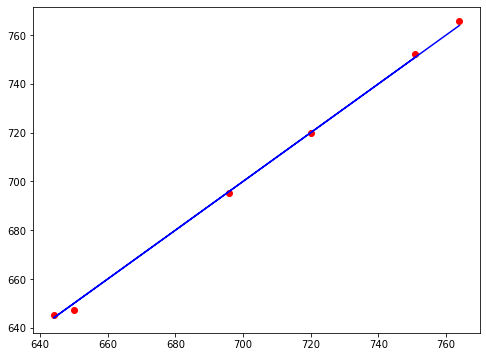

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Lasso

In [42]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':[62],'selection':["cyclic","random"],'precompute':[True,False]}
Las= Lasso()
FitParameters= GridSearchCV(Las,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'alpha': 1, 'precompute': True, 'random_state': 62, 'selection': 'cyclic'}


In [43]:
Las = Lasso(alpha=1,random_state=62,precompute=True,selection="cyclic")
Las.fit(x_train,y_train)
Las.score(x_train,y_train)
pred_lasso = Las.predict(x_test)

Lasso = r2_score(y_test,pred_lasso)
Lasso

0.9980455169216957

In [44]:
cvscore=cross_val_score(Las,x,y,cv=5)
cvmean=cvscore.mean()
cvmean

0.9943397275753693

# Random Forest

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"],'random_state':[62],'bootstrap':[True,False]}
rf =RandomForestRegressor()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'bootstrap': True, 'criterion': 'mae', 'max_features': 'auto', 'random_state': 62}


In [47]:
rf= RandomForestRegressor(criterion="mae",max_features="auto",random_state=62,bootstrap=True)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_train,y_train,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 90.08128168290078
Cross Val Score: 81.44357907810631


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae','poisson'], 'splitter':['best', 'random'],'max_features':["auto","sqrt","log2"],'random_state':[62]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'random_state': 62, 'splitter': 'best'}


In [49]:
DTR = DecisionTreeRegressor(criterion='mae', splitter='best',random_state=62,max_features='auto')
DTR.fit(x_train,y_train)
DTR.score(x_train,y_train)
pred_decision = DTR.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(DTR,x_train,y_train,cv=5)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 94.91491913693339
Cross Val Score: 71.37371994636979


In [53]:
from sklearn.svm import LinearSVR
parameters = {'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'], 'random_state':[62],'fit_intercept':[True,False]}
SVR =LinearSVR()
clf = GridSearchCV(SVR,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'random_state': 62}


In [55]:
SVR = LinearSVR(fit_intercept=True, loss='squared_epsilon_insensitive',random_state=62)
SVR.fit(x_train,y_train)
SVR.score(x_train,y_train)
pred_decision = SVR.predict(x_test)

SVRs = r2_score(y_test,pred_decision)
print('R2 Score:',SVRs*100)

SVRscore = cross_val_score(SVR,x_train,y_train,cv=5)
SVRc = SVRscore.mean() 
print('Cross Val Score:',SVRc*100)

R2 Score: 47.31284929720104
Cross Val Score: -130.92600230855354


From the above we conclude that Lasso is the best Fit algorithm for this dataset

In [56]:
import pickle
filename = 'BB.pkl'
pickle.dump(Las, open(filename, 'wb'))

In [57]:
import numpy as np
a=np.array(y_test)
a

array([764, 720, 650, 644, 696, 751], dtype=int64)

In [58]:
predicted=np.array(Las.predict(x_test))
predicted

array([768.11603775, 719.30240677, 649.38601342, 644.05061224,
       694.43513814, 753.11124985])

In [59]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [60]:
conclusion

,original,predicted
0,764,768.116038
1,720,719.302407
2,650,649.386013
3,644,644.050612
4,696,694.435138
5,751,753.111250
